## Perceptron Learning

In [108]:
%matplotlib inline
import pandas as pd
from numba import jit
import seaborn as sns
from collections import defaultdict
import numpy as np

train_iris = pd.read_csv("iris/iris_train.data", 
                         names = ["sepal_length","sepal_width","petal_length",
                                  "petal_width","label"])
test_iris = pd.read_csv("iris/iris_test.data",
                        names = ["sepal_length","sepal_width",
                                 "petal_length","petal_width","label"])

In [109]:
train_iris.head()
#train_iris.count()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Counting the Number of Labels of each type

In [110]:
train_iris["label"].value_counts()

Iris-versicolor    35
Iris-setosa        35
Name: label, dtype: int64

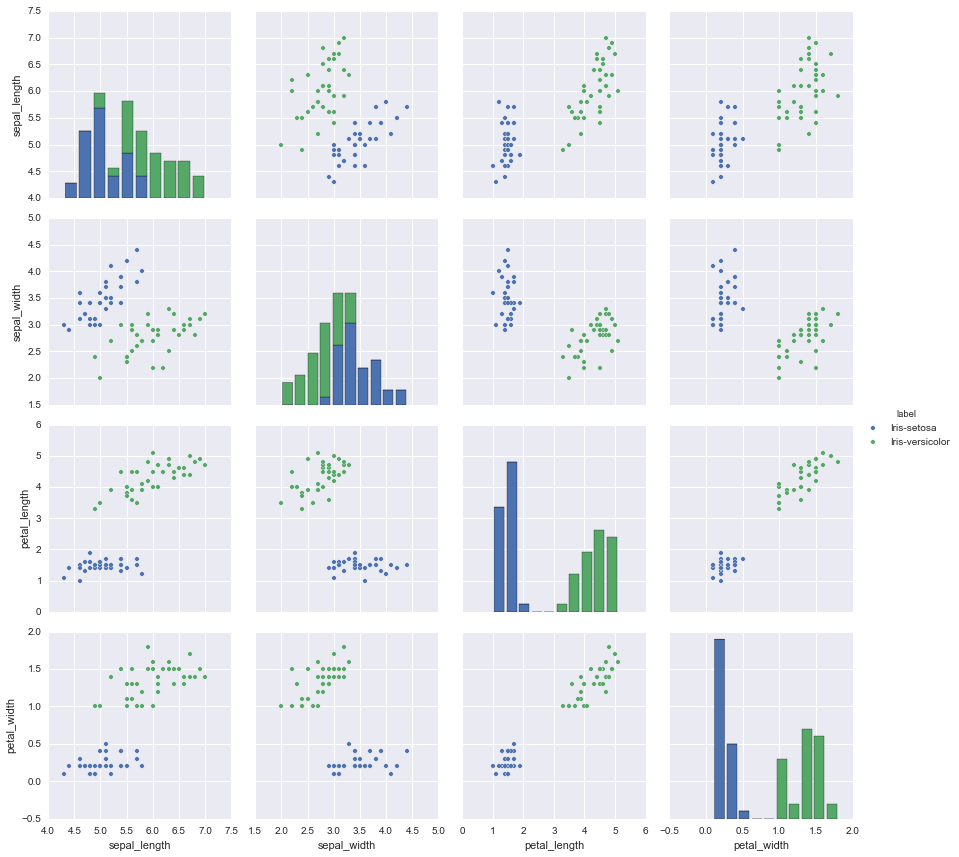

In [111]:
sns.pairplot(train_iris, hue="label", size=3)

## Perceptron Learning Algorithm Modified for Test Error

Reference --> https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb

In [112]:
import numpy as np
from sklearn.metrics import accuracy_score

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=5):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            # The Below line was commented to run the function on Z-Score Normalized Values
            print "Epoch %s: Test error: %s " % (self.n_iter,accuracy_score(y_test, self.predict(X_test)))
            #print "Epoch %s: Test error: %s " % (self.n_iter,accuracy_score(y_test, self.predict(test_iris_z)))
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



The Test Classification Accuracy reaches 1.0 in 2 epochs whereas the Training Accuracy reaches 100% in 4 epochs

(70, 4)
(70,)
Epoch 10: Test error: 0.5 
Epoch 10: Test error: 0.5 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 
Epoch 10: Test error: 1.0 


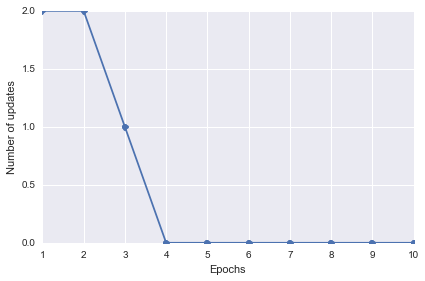

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = train_iris.iloc[0:70, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract all the features from the Training set
X = train_iris.iloc[0:70, [0, 1, 2, 3]].values


y_test = test_iris.iloc[0:70, 4].values
y_test = np.where(y_test == 'Iris-setosa', -1, 1)

# extract all the features from the Training set
X_test = test_iris.iloc[0:70, [0, 1, 2, 3]].values

print X.shape
print y.shape

ppn = Perceptron(eta=1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [101]:
from scipy import stats

dict=defaultdict(lambda: {})
columns=[]
def z_score_tranformation():
    iris_train_z=train_iris
    columns=list(iris_train_z.columns)
    columns.remove("label")
    for col in columns:
        dict[col]['mean_value']=iris_train_z[col].mean()
        dict[col]['std_value']=iris_train_z[col].std(ddof=0)

#Normalizing the values of the Training and Test Dataset using the Training Data z-score Normalization       
def transform_zscore(dataframe):
        df = dataframe.copy(deep = True) 
        for col in columns:
            df[col] = (df[col] - dict[col]['mean_value']) / dict[col]['std_value']
        return df
    
transformation = z_score_tranformation()
train_iris_z = transform_zscore(train_iris)
test_iris_z = transform_zscore(test_iris)

ppn = Perceptron(eta=1, n_iter=10)
ppn.fit(X, y)
    



Epoch 1: Test error: 0.0 
Epoch 2: Test error: 0.0 
Epoch 3: Test error: 0.0 
Epoch 4: Test error: 0.0 
Epoch 5: Test error: 0.0 
Epoch 6: Test error: 0.0 
